In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import clip, PCAreduce, plotSpectrum

In [ ]:
imgBruiseCube12h = sp.open_image("../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr")
imgBruiseCube48h = sp.open_image("../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr")
imgHealthyCube = sp.open_image("../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr")

N,M,bands = imgBruiseCube12h.shape


imgBruiseCube12h = imgBruiseCube12h.read_subregion([4600, imgBruiseCube12h.shape[0]], [0, imgBruiseCube12h.shape[1]])
imgBruiseCube48h  = imgBruiseCube48h.read_subregion([4520, imgBruiseCube48h.shape[0]], [0, imgBruiseCube48h.shape[1]])
imgHealthyCube  = imgHealthyCube.read_subregion([4800, 5624], [0, imgHealthyCube.shape[1]])


clip(imgBruiseCube12h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgBruiseCube48h, 0, 1)  # clipps the values in imgCube between 0,1.
clip(imgHealthyCube, 0, 1)
print("done")

In [ ]:
imgCube8bit0h = (imgHealthyCube*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit0h[:,:,185])
res0h = np.hstack((imgCube8bit0h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res0h, figsize=(15,10))

imgCube8bit12h = (imgBruiseCube12h*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit12h[:,:,185])
res12h = np.hstack((imgCube8bit12h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res12h, figsize=(15,10))

imgCube8bit48h = (imgBruiseCube48h*255).astype('uint8')
equ = cv2.equalizeHist(imgCube8bit48h[:,:,185])
res48h = np.hstack((imgCube8bit48h[:,:,185],equ)) #stacking images side-by-side
sp.imshow(res48h, figsize=(15,10))

In [ ]:
img12_PCA, eigenvalues1 = PCAreduce(imgBruiseCube12h, frac=0.99)
img48_PCA, eigenvalues2 = PCAreduce(imgBruiseCube48h, frac=0.99)
img1_PCA,  eigenvalues3 = PCAreduce(imgHealthyCube,   frac=0.99)

In [ ]:
img12_PCA_scaled = (img12_PCA - np.amin(img12_PCA)) / (np.amax(img12_PCA) - np.amin(img12_PCA))
img48_PCA_scaled  = (img48_PCA - np.amin(img48_PCA)) / (np.amax(img48_PCA) - np.amin(img48_PCA))
img1_PCA_scaled  = (img1_PCA - np.amin(img1_PCA)) / (np.amax(img1_PCA) - np.amin(img1_PCA))

img12_PCA_scaled[:,:,0] = img12_PCA_scaled[:,:,0]*(-1)
img48_PCA_scaled[:,:,0] = img48_PCA_scaled[:,:,0]*(-1)

sp.imshow(img48_PCA_scaled[:,:,0], figsize=(10,10))


In [ ]:


k = 7

class_map12, centers = sp.kmeans(img12_PCA_scaled,max_iterations=60, nclusters=k)

view = sp.imshow(img12_PCA_scaled[:,:,0], classes=class_map12, title="img12_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

clusters = []
class_map48, centers = sp.kmeans(img48_PCA_scaled, max_iterations=60, nclusters=k, frames=clusters)

view = sp.imshow(img48_PCA_scaled[:,:,0], classes=class_map48, title="img48_PCA_scaled")
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data


#sp.imshow(imgCube, [20,80,150], stretch=((0.02, 0.98), (0.02, 0.98), (0.02, 0.98))) rgb

In [ ]:
temp = np.array(clusters)[0]
sp.imshow(temp)
temp[temp != 1] = 0
sp.imshow(temp)


In [ ]:
#print(np.array(centers).shape)
#for c in centers:
#    plt.plot(c)
#plt.figure()
class_map, centers = sp.kmeans(img1_PCA_scaled, nclusters=k)
view = sp.imshow(img1_PCA_scaled[:,:,0],stretch=0.01, classes=class_map)
view.set_display_mode('overlay')
view.class_alpha = 1 #set transparency
view.show_data

In [ ]:
spectra = np.zeros([1,bands])
spectra[0] = np.array(imgBruiseCube48h[450,1400])
#spectra[1] = np.array(imgHealthyCube[410,210])

angles = sp.spectral_angles(imgBruiseCube48h, spectra)[:,:,0]
print(angles.shape)

plt.imshow(angles, cmap="gray")
plt.figure()
angles[angles > np.pi / 70] = 0

plt.imshow(angles, cmap="gray")
plt.figure()

In [56]:
files = [ "../Strawberry/Normalised/STR_B1_before-hit_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T184054_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_30min_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T193019_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_1hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T202126_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_3hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T214153_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_24h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T181621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr"
        ]
def meanSpectrum(cube, ksize = 3):
    bands = cube.shape[2]
    avgSpec = np.zeros(bands)    
    for i in range(bands):
        avgSpec[i] = cube[:,:,i].mean()
    return avgSpec


names = np.array(["before-hit", "0m","30m","1h" ,"3h","12h", "24h", "48h"])
#nonbruised pixels
pixel_h = np.array([[5383,1293], [5236,1270], [5202,1350], [5339,1283], [5317,1248],[5043,1168],[4955,1293], [4917,1251]])
#bruised pixels
pixel_b = np.array([[5392,1460],[5314,1462],[5288,1543],[5428,1474],[5409,1441],[5134,1353],[5036,1474],[4988,1440]]) 


<Figure size 432x288 with 0 Axes>

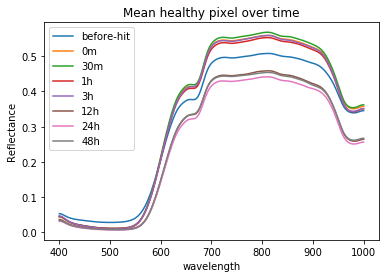

<Figure size 432x288 with 0 Axes>

In [64]:
library_nonbruise = []

kSize = 20
for i in range(len(names)):
    region = sp.open_image(files[i]).read_subregion((pixel_h[i][0] - kSize//2, pixel_h[i][0] + kSize//2 +1), 
                                                    (pixel_h[i][1] - kSize//2, pixel_h[i][1] + kSize//2 +1))
    library_nonbruise.append([meanSpectrum(region,kSize), names[i]]) 

for spec in library_nonbruise:
    plotSpectrum(spec[0], xaxis="wavelength", linelabel=spec[1])
    

plt.title('Mean healthy pixel over time')
#plt.savefig("spectralLibary_healthy_region.png")
plt.figure()



<Figure size 432x288 with 0 Axes>

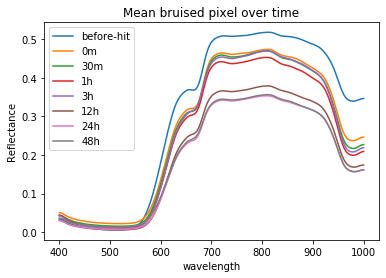

<Figure size 432x288 with 0 Axes>

In [55]:


library_bruise = []

for i in range(len(names)):
    region = sp.open_image(files[i]).read_subregion((pixel_b[i][0] - kSize//2, pixel_b[i][0] + kSize//2 +1), 
                                                    (pixel_b[i][1] - kSize//2, pixel_b[i][1] + kSize//2 +1))
    library_bruise.append([meanSpectrum(region,kSize), names[i]]) 


for spec in library_bruise:
    plotSpectrum(spec[0], xaxis="wavelength", linelabel=spec[1])
    

plt.title('Mean bruised pixel over time')
#plt.savefig("spectralLibary_bruise_region.png")

plt.figure()